# Final Project

## Step 1: 導入所需的套件

In [3]:
## 導入Python的數據處理套件
import numpy as np
import pandas as pd
## 導入視覺化套件
import matplotlib.pyplot as plt
import seaborn as sns
## 導入Sklearn標準化模組
from sklearn.preprocessing import StandardScaler

## 導入學習模組
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## 將數據集分成訓練集與測試集的套件
from sklearn.model_selection import train_test_split
## 導入Sklearn中的metrics 評估模型性能指標
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.metrics import RocCurveDisplay

## 導入SMOTE
from imblearn.over_sampling import SMOTE


## Step 2: 導入數據集

In [5]:
# 導入數據集
data = pd.read_csv('b_depressed.csv')
'''
「這些資料來自肯亞西部維多利亞湖附近錫亞縣農村地區布薩拉中心於2015年進行的一項研究。
該調查包括70 多個特徵，包括有關家庭組成、經濟活動、資金流動和健康的資訊。
原始連結在這裡： https: //zindi.africa/competitions/busara-mental-health-prediction-challenge/data
'''
'''
Survey_id：            個人識別ID
Ville_id：             村莊識別ID
sex：                  性別(0=女, 1=男)    (分類變數)
Age：                  年齡
Married：              結婚(0=無, 1=有)    (分類變數)
Number_children：      子女個數
education_level：      教育年資
total_members：        家同成員總數
gained_asset：         獲得資產
durable_asset：        耐久資產
save_asset：           存款
living_expenses：      生活費
other_expenses：       其他費用
incoming_salary：      收入來源_薪水      (分類變數)
incoming_own_farm：    收入來源_自己的農場 (分類變數)
incoming_business：    收入來源_業務收入   (分類變數)
incoming_no_business： 收入來源_非業務收入 (分類變數)
incoming_agricultural：收入來源_農業經營   
farm_expenses：        農場費用
labor_primary：        初級勞動            (分類變數)
lasting_investment：   長期投資
no_lasting_investmen： 非長期投資
depressed：            是否憂鬱            (分類變數)
'''
## 顯示數據集
data

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


## Step 3: 檢察缺失值

<Axes: >

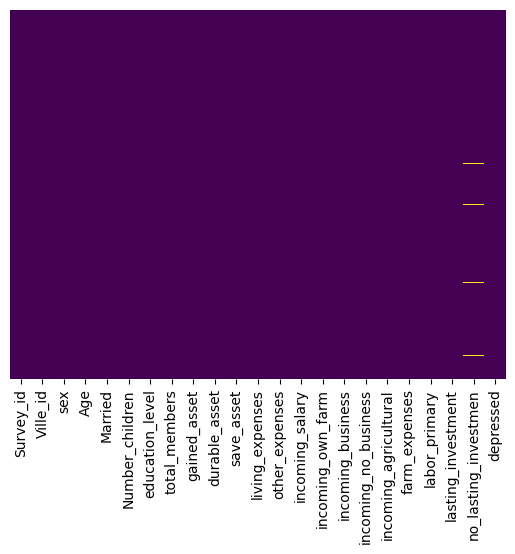

In [7]:
## 用熱點圖，圖像化觀察
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
data.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

In [9]:
#因缺失資料只有20筆，小於整體dataset 5%，故選擇移除
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Survey_id                0
Ville_id                 0
sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64

## Step 4: 製圖觀察特徵

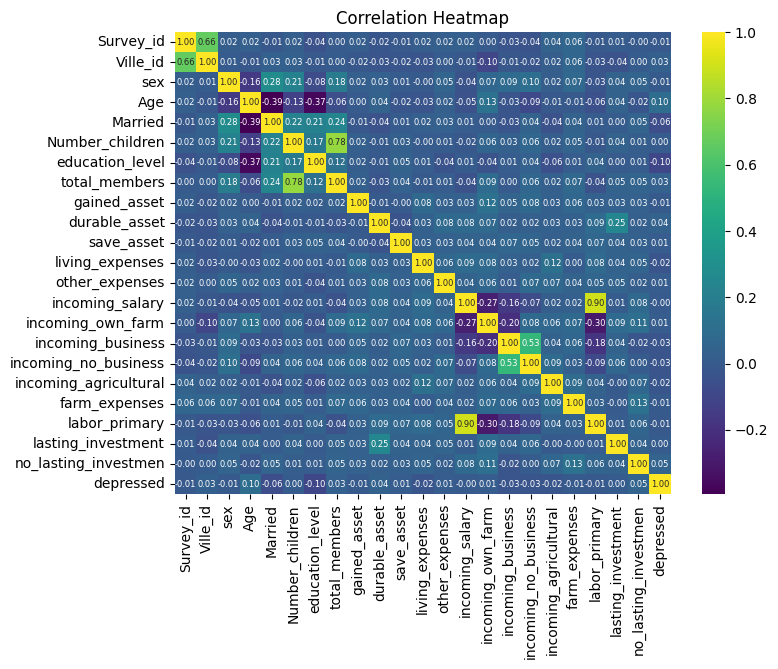

In [12]:
# 計算相關矩陣
correlation_matrix = data.corr()

# 繪製成熱點圖
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 6}, cbar_kws={"shrink": 1})
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Depression')

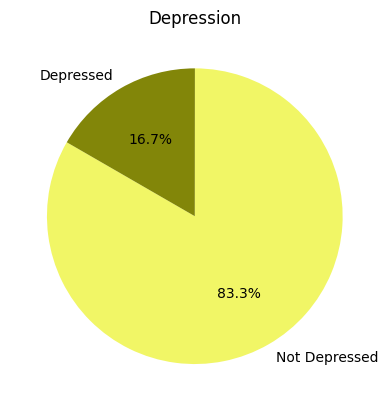

In [13]:
#看憂鬱症人數      憂鬱人數遠低於非憂鬱人數
depressed_count = data['depressed'].value_counts()
labels = ['Not Depressed', 'Depressed']
colors = ['#F1F666', '#828609']
plt.pie(depressed_count, labels=labels, autopct='%1.1f%%', startangle=150, colors=colors)
plt.title('Depression')

Text(0.5, 1.0, 'sex')

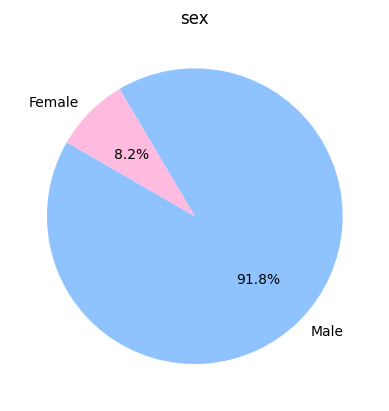

In [14]:
#看受訪者男女數量   男性數量比較多。
sex_count = data['sex'].value_counts()
labels = ['Male','Female']
colors = ['#8EC3FF', '#FFBBDF']
plt.pie(sex_count, labels=labels, autopct='%1.1f%%', startangle=150, colors=colors)
plt.title('sex')

<Axes: xlabel='Age', ylabel='Count'>

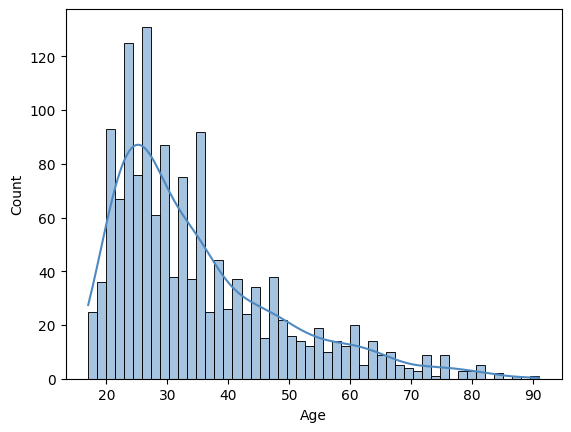

In [15]:
#看年齡散佈圖  20~30歲受訪者數量最多
sns.histplot(data['Age'],kde=True,bins=50,color='#4E89C1')

<Axes: xlabel='Number_children', ylabel='count'>

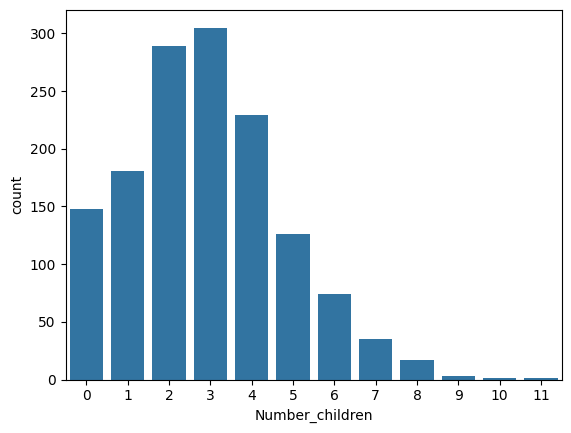

In [16]:
#看受訪者子女個數   農村很多人生3個小孩
sns.countplot(x='Number_children',data=data)

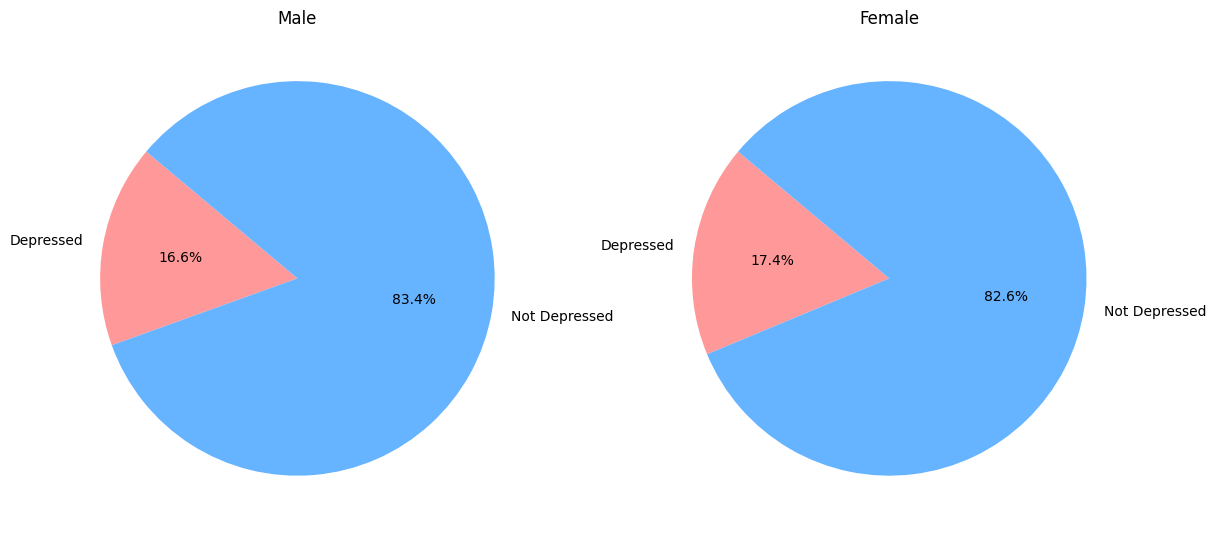

In [17]:
#看性別是否影響憂鬱症？   男女憂鬱症比例差不多
male_depressed = data[(data['sex'] == 1) & (data['depressed'] == 1)].shape[0]
male_not_depressed = data[(data['sex'] == 1) & (data['depressed'] == 0)].shape[0]
female_depressed = data[(data['sex'] == 0) & (data['depressed'] == 1)].shape[0]
female_not_depressed = data[(data['sex'] == 0) & (data['depressed'] == 0)].shape[0]

# 設置子圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(aspect="equal"))

# 男生憂鬱症比例
male_labels = ['Depressed', 'Not Depressed']
male_sizes = [male_depressed, male_not_depressed]
male_colors = ['#ff9999','#66b3ff']

ax1.pie(male_sizes, labels=male_labels, autopct='%1.1f%%', startangle=140, colors=male_colors)
ax1.set_title('Male')

# 女生憂鬱症比例
female_labels = ['Depressed', 'Not Depressed']
female_sizes = [female_depressed, female_not_depressed]
female_colors = ['#ff9999','#66b3ff']

ax2.pie(female_sizes, labels=female_labels, autopct='%1.1f%%', startangle=140, colors=female_colors)
ax2.set_title('Female')

plt.show()


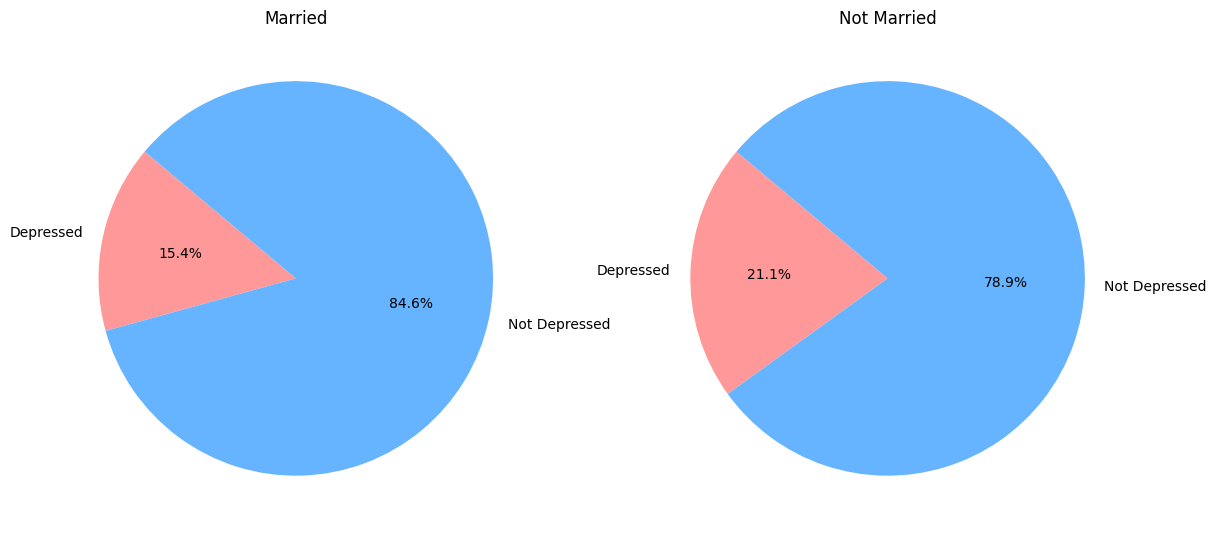

In [18]:
#看結婚是否影響憂鬱症？   沒結婚憂鬱症比例較高。
married_depressed = data[(data['Married'] == 1) & (data['depressed'] == 1)].shape[0]
married_not_depressed = data[(data['Married'] == 1) & (data['depressed'] == 0)].shape[0]
not_married_depressed = data[(data['Married'] == 0) & (data['depressed'] == 1)].shape[0]
not_married_not_depressed = data[(data['Married'] == 0) & (data['depressed'] == 0)].shape[0]

# 設置子圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(aspect="equal"))

# 有結婚憂鬱症比例
married_labels = ['Depressed', 'Not Depressed']
married_sizes = [married_depressed, married_not_depressed]
married_colors = ['#ff9999','#66b3ff']

ax1.pie(married_sizes, labels=married_labels, autopct='%1.1f%%', startangle=140, colors=married_colors)
ax1.set_title('Married')

# 沒結婚憂鬱症比例
not_married_labels = ['Depressed', 'Not Depressed']
not_married_sizes = [not_married_depressed, not_married_not_depressed]
not_married_colors = ['#ff9999','#66b3ff']

ax2.pie(not_married_sizes,labels=not_married_labels, autopct='%1.1f%%', startangle=140, colors=not_married_colors)
ax2.set_title('Not Married')

plt.show()

## Step 5: 數據整理

In [33]:
#刪除無用資，如個人ID與村莊ID
data.drop(['Survey_id','Ville_id'],axis=1,inplace=True)

In [35]:
#因dataset特徵具有不同的量級，進行數據標準化
#選擇Standardization，因數據具有常態分佈性
scaler = StandardScaler()

#而需要Standardization為「連續變量」，在開頭dataset有做註記
columns_to_standardize = ['Age', 'Number_children', 'total_members', 'gained_asset', 
                          'durable_asset', 'save_asset', 'living_expenses','other_expenses',
                         'incoming_agricultural','farm_expenses','lasting_investment','no_lasting_investmen','education_level']
# 對選定的列進行標準化
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

In [37]:
data

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,-0.488108,1,0.585016,0.447135,0.002002,-0.233851,-0.233363,-0.227442,-0.275851,...,0,0,0,0,-0.217357,-0.196929,0,-0.217309,-0.245948,0
1,1,-0.850537,1,0.050805,-0.239528,0.002002,-0.233851,-0.233363,-0.227442,-0.275851,...,0,0,0,0,-0.217357,-0.196929,0,-0.217309,-0.245948,1
2,1,-0.923023,1,0.050805,0.103803,0.002002,-0.233851,-0.233363,-0.227442,-0.275851,...,0,0,0,0,-0.217357,-0.196929,0,-0.217309,-0.245948,0
3,1,-0.560594,1,-0.483406,0.447135,-0.562284,0.949678,-0.408733,1.248573,-1.527659,...,0,1,0,1,-0.587530,-0.790164,0,-1.193110,1.649296,0
4,0,1.758950,0,0.585016,0.447135,0.566289,2.441322,-0.538818,-0.227442,2.303754,...,1,0,0,0,0.899546,-0.697046,1,-0.610416,0.454539,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1,-0.705566,1,-1.017617,-0.582859,0.002002,-0.233851,-0.233363,-0.227442,-0.275851,...,0,0,0,0,-0.217357,-0.196929,0,-0.217309,-0.245948,0
1425,1,-0.488108,1,0.585016,0.447135,0.566289,-0.891563,-0.168987,-0.671321,-1.047826,...,0,1,0,0,-0.552427,-1.624118,0,-1.474898,0.638146,0
1426,1,2.266350,0,-1.551827,-2.642847,-2.255144,0.440174,-0.233363,-0.274531,-0.949344,...,0,1,0,0,-1.053438,-1.180422,0,0.635621,-1.071998,1
1427,1,1.179064,1,-1.017617,1.133797,0.002002,-0.233851,-0.233363,-0.227442,-0.275851,...,0,0,0,0,-0.217357,-0.196929,0,-0.217309,-0.245948,0


## Step 6: 自訂Features以及Target

In [40]:
#建立features資料集
X = data.drop(['depressed'],axis=1)
#建立target資料集
y = data['depressed']

## Step 7: 切割數據training set與test set

In [43]:
#train_set=80%, test_set=20%
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   
print(X_training.shape)
print(X_test.shape)

(1127, 20)
(282, 20)


## Step 8: training set切割成train 與 val

In [46]:
#train_set=60%, test_set=20%, val_set=20%(0.8*0.25=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_val.shape)

(845, 20)
(282, 20)


## Step 9: 使用SMOTE對train重組資料
[Nitesh V. Chawla, Kevin W. Bowyer SMOTE: synthetic minority over-sampling technique. J. Artif. Int. Res. 16, 1 (January 2002), 321–357.](https://arxiv.org/pdf/1106.1813)
![image1](image1.png)
![image3](image3.png)
![image2](image2.png)

In [49]:
#平衡數據           'minority'：僅對少數類別進行重新採樣                
smote = SMOTE(sampling_strategy='minority', k_neighbors=20, random_state=42)

#使用SMOTE重新抽樣
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [51]:
#重新抽樣數據量
print(X_resampled.shape)
print(y_resampled.shape)

(1396, 20)
(1396,)


Text(0.5, 1.0, 'Depression')

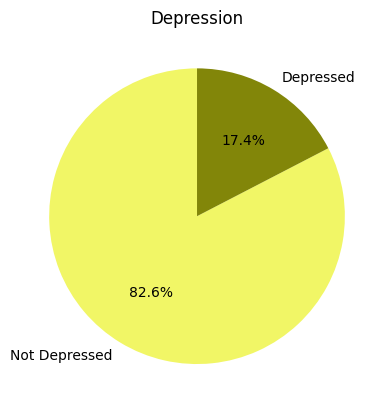

In [61]:
#SMOTE前，憂鬱症分布情況
depressed_count = y_train.value_counts()
labels = ['Not Depressed', 'Depressed']
colors = ['#F1F666', '#828609']
plt.pie(depressed_count, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Depression')

Text(0.5, 1.0, 'Depression')

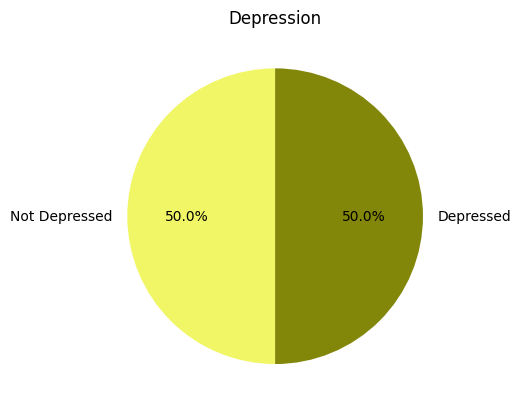

In [55]:
#SMOTE後，憂鬱症分布情況
depressed_count = y_resampled.value_counts()
labels = ['Not Depressed', 'Depressed']
colors = ['#F1F666', '#828609']
plt.pie(depressed_count, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Depression')

## Step 10: 交叉驗證recall，選擇模型

In [36]:
# 定義模型
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier()
}

In [122]:
scoring_methods = ['accuracy', 'precision', 'recall', 'f1']

# 進行交叉驗證並計算每個模型的各種評估指標
for model_name, model in models.items():
    print(f"\n{model_name}")
    for scoring in scoring_methods:
        scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring=scoring)
        print(f"{scoring}: {scores.mean():.4f} ± {scores.std():.4f}")



Random Forest
accuracy: 0.8598 ± 0.1175
precision: 0.8763 ± 0.0395
recall: 0.8413 ± 0.2354
f1: 0.8414 ± 0.1671

SVM
accuracy: 0.7544 ± 0.0795
precision: 0.7034 ± 0.0542
recall: 0.8655 ± 0.1406
f1: 0.7741 ± 0.0911

Logistic Regression
accuracy: 0.7029 ± 0.1003
precision: 0.6602 ± 0.0786
recall: 0.7925 ± 0.1982
f1: 0.7153 ± 0.1348

KNN
accuracy: 0.7300 ± 0.0349
precision: 0.6735 ± 0.0309
recall: 0.8968 ± 0.0258
f1: 0.7690 ± 0.0262


## Step 11: 選擇Random Forest驗證效果

In [150]:
rf = RandomForestClassifier(n_estimators=400, random_state=42)
rf.fit(X_resampled,y_resampled)

RandomForestClassifier(n_estimators=400, random_state=42)

In [151]:
rf_2 = RandomForestClassifier(n_estimators=400,random_state=42)
rf_2.fit(X_training,y_training)

RandomForestClassifier(n_estimators=400, random_state=42)

In [154]:
predictions_resampled = rf.predict(X_resampled)
predictions_val = rf.predict(X_val)
predictions_test = rf.predict(X_test)
predictions_training = rf_2.predict(X_test)

In [156]:
def evaluate_model(model, X, y, label):
    predictions = model.predict(X)
    acc = accuracy_score(y, predictions)
    prec = precision_score(y, predictions)
    rec = recall_score(y, predictions)
    f1 = f1_score(y, predictions)
    return pd.DataFrame([[label, acc, prec, rec, f1]], 
                        columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# 評估不同數據集上的模型
results_training = evaluate_model(rf_2, X_test, y_test, 'Random Forest (training)')
results_resampled = evaluate_model(rf, X_resampled, y_resampled, 'Random Forest (resampled)')
results_val = evaluate_model(rf, X_val, y_val, 'Random Forest (val)')
results_test = evaluate_model(rf, X_test, y_test, 'Random Forest (test)')


results = pd.concat([results_training, results_resampled, results_val, results_test])
results


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest (training),0.843972,0.200000,0.024390,0.043478
0,Random Forest (resampled),0.997851,0.998565,0.997135,0.997849
0,Random Forest (val),0.769504,0.218750,0.148936,0.177215
0,Random Forest (test),0.755319,0.131579,0.121951,0.126582


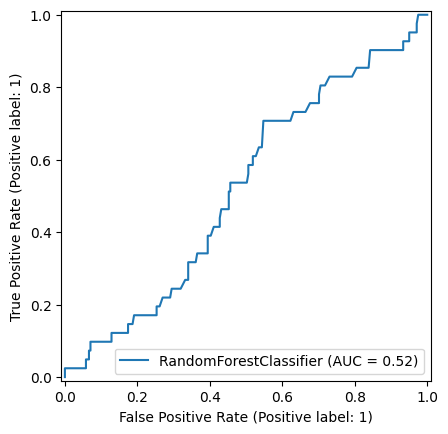

In [158]:
#繪製ROC曲線
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)

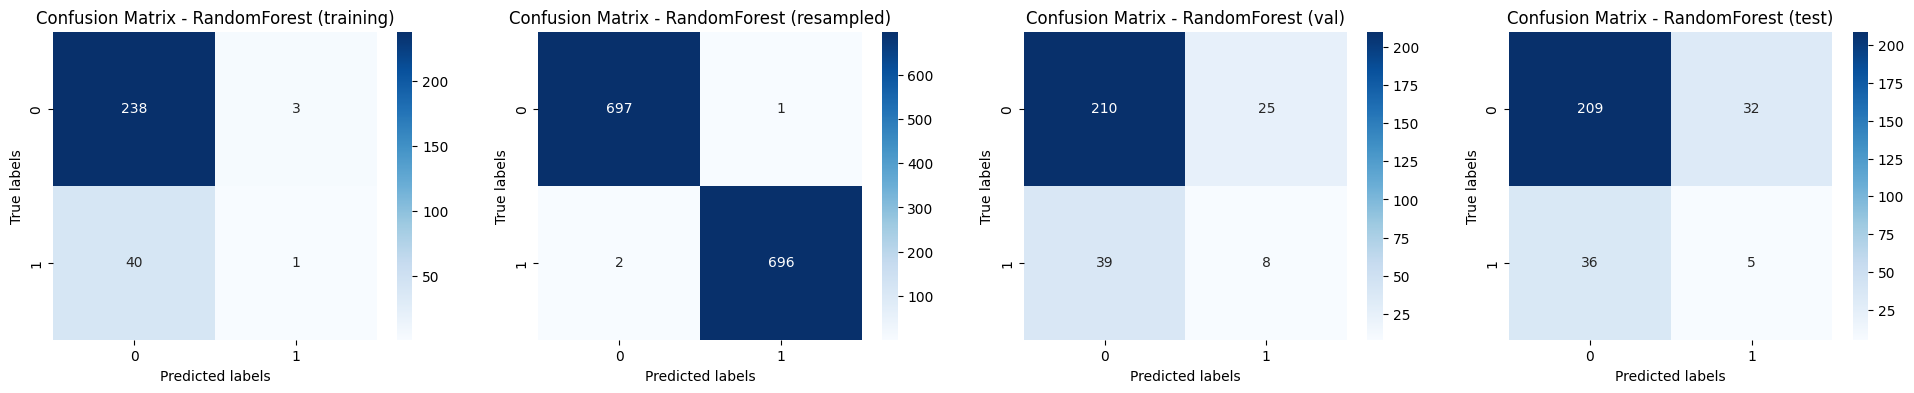

In [134]:
def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

fig, axes = plt.subplots(1, 4, figsize=(24, 4))

# 未SMOTE訓練集混淆矩陣
plot_confusion_matrix(y_test, predictions_training, 'Confusion Matrix - RandomForest (training)', axes[0])

# 訓練集混淆矩陣
plot_confusion_matrix(y_resampled, predictions_resampled, 'Confusion Matrix - RandomForest (resampled)', axes[1])

# 驗證集混淆矩陣
plot_confusion_matrix(y_val, predictions_val, 'Confusion Matrix - RandomForest (val)', axes[2])

# 測試集混淆矩陣
plot_confusion_matrix(y_test, predictions_test, 'Confusion Matrix - RandomForest (test)', axes[3])

plt.show()


In [136]:
rf_importances = rf.feature_importances_

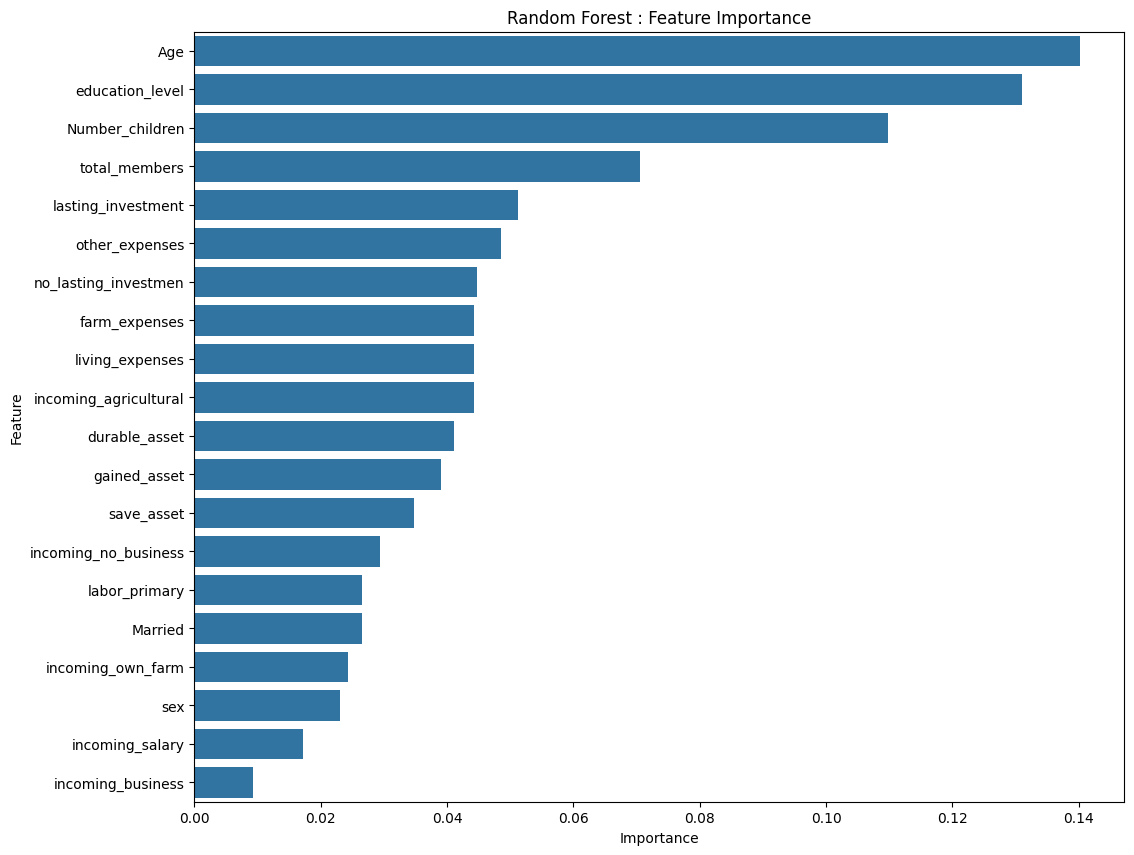

In [138]:
forest_feature_df = pd.DataFrame({'feature': X.columns,'importance': rf_importances})

# 進行排序
forest_feature_df = forest_feature_df.sort_values(by='importance', ascending=False)

# 繪製條形圖
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=forest_feature_df)
plt.title('Random Forest : Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()